In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

Dataset Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
## Check Imbalance Data

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
pd.crosstab(index=df['Class'], columns='count', normalize = True)*100

col_0,count
Class,
0,99.827251
1,0.172749


## Create Model to Detect Fraud
- 1 => Fraud
- 0 => Non-Fraud

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

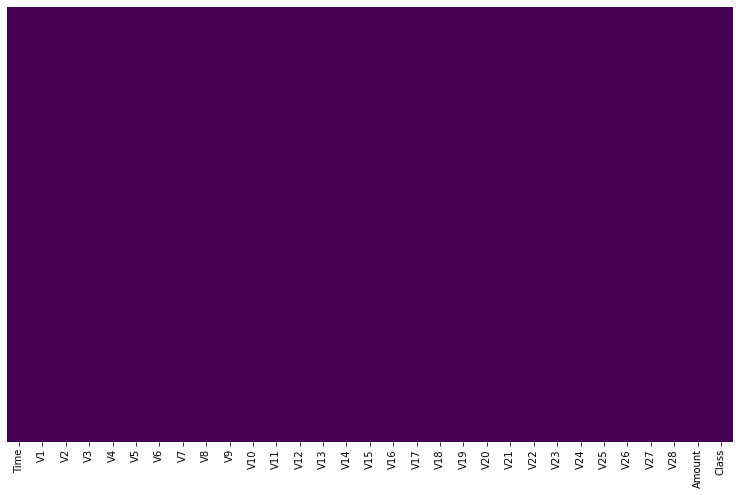

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap = 'viridis', cbar = False, yticklabels=False)
plt.show()

In [15]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
## Splitting Data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(columns='Class')
y = df['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,train_size = .80, random_state = 42)

In [7]:
X_train.shape

(56961, 30)

In [22]:
X_test.shape

(227846, 30)

In [6]:
from sklearn.linear_model import LogisticRegression

In [1]:
## EValuation Matrix

In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [23]:
## ML Modelling

In [7]:
LR = LogisticRegression()

In [8]:
LR.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_predLR = LR.predict(X_test)

In [11]:
y_trainLR = LR.predict(X_train)

In [ ]:
## Train

In [22]:
print(classification_report(y_train,y_trainLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.73      0.61      0.66       394

    accuracy                           1.00    227845
   macro avg       0.86      0.80      0.83    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
## Test

In [23]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.67      0.68        98

    accuracy                           1.00     56962
   macro avg       0.85      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
accuracy_score(y_test,y_predLR)

0.9989291106351603

In [27]:
cm_LR_ts = confusion_matrix(y_test, y_predLR, labels=[1,0])

In [29]:
df_LR_ts = pd.DataFrame(cm_LR_ts, index=['Akt 1','Akt 0'], columns = ['Pred 1','Pred 0'])
df_LR_ts

,Pred 1,Pred 0
Akt 1,66,32
Akt 0,29,56835


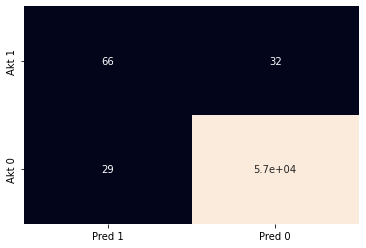

In [30]:
sns.heatmap(df_LR_ts, annot=True, cbar=False)
plt.show()

In [31]:
cm_LR_tr = confusion_matrix(y_train, y_trainLR, labels=[1,0])

In [32]:
df_LR_tr = pd.DataFrame(cm_LR_tr, index=['Akt 1','Akt 0'], columns = ['Pred 1','Pred 0'])
df_LR_tr

,Pred 1,Pred 0
Akt 1,239,155
Akt 0,89,227362


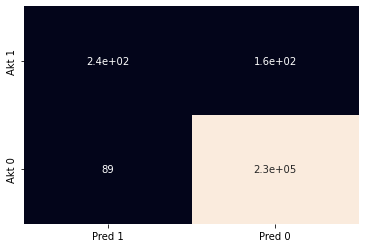

In [33]:
sns.heatmap(df_LR_tr, annot=True, cbar=False)
plt.show()

In [34]:
## handling imbalanced data

In [ ]:
- random sampling and smote only used for train data (X_train - y_train)

In [ ]:
## random sampling

In [12]:
df_train  =pd.concat([X_train, y_train], axis=1)

In [37]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [38]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [39]:
non_fraud = df_train[df_train['Class'] == 0] ## kelas majority

In [40]:
fraud = df_train[df_train['Class']==1] ## kelas minority

## random over sampling
- **Duplicating dara randomly** class-target minority (class 1) until it has the same amount with class-target majority (class 0).
- **Fraud** dataframe will be over sampling until it has the same amount with **Non Fraud** dataframe 

In [13]:
from sklearn.utils import resample

In [43]:
fraud_oversample = resample(fraud, replace=True, n_samples=len(non_fraud), random_state = 42)

In [44]:
df_Oversample = pd.concat([non_fraud,fraud_oversample])

In [45]:
df_Oversample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [46]:
df_Oversample['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [47]:
X_train_OS = df_Oversample.drop(columns='Class')
y_train_OS = df_Oversample['Class']

In [48]:
LR_OS = LogisticRegression()

In [49]:
LR_OS.fit(X_train_OS, y_train_OS)

LogisticRegression()

In [50]:
y_predOS = LR_OS.predict(X_test)

In [51]:
print(classification_report(y_test,y_predOS))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [52]:
cm_OS = confusion_matrix(y_test, y_predOS, labels=[1,0])

In [54]:
df_OS = pd.DataFrame(cm_OS, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_OS

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,2758,54106


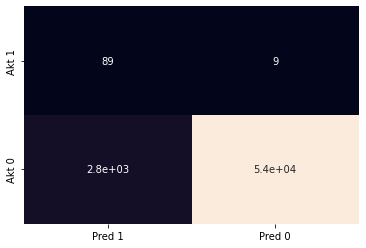

In [55]:
sns.heatmap(df_OS, annot=True, cbar=False)
plt.show()

## Random Under Sampling
- **Remove data randomly** in majority class(clas 0) until it has the same amount with (class 1)
- **Non Fraud** data frame will be undersampling until it has the same amount with **Fraud** dataframe
-  Under Sampling rarely to be used. It has a chance to lose some information 

In [56]:
df_train.head() ## X_train + y_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [57]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [58]:
non_fraud = df_train[df_train['Class']==0] ## majority class
fraud = df_train[df_train['Class']==1] ## minority class

In [63]:
non_fraud_Undersample = resample(non_fraud, # majority class
                                 replace=False,
                                 n_samples=len(fraud), #minority class
                                 random_state = 42)

In [64]:
df_Undersample = pd.concat([non_fraud_Undersample, fraud])

In [65]:
df_Undersample['Class'].value_counts()

0    394
1    394
Name: Class, dtype: int64

In [66]:
X_train_US = df_Undersample.drop(columns='Class')
y_train_US = df_Undersample['Class']

In [67]:
LR_US = LogisticRegression()

In [68]:
LR_US.fit(X_train_US, y_train_US)

LogisticRegression()

In [69]:
y_predUS = LR_US.predict(X_test)

In [70]:
print(classification_report(y_test,y_predUS))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [72]:
cm_US = confusion_matrix(y_test, y_predUS, labels=[1,0])

In [74]:
df_US = pd.DataFrame(cm_US, index=['Akt 1', 'Akt 0'], columns = ['Pred 1','Pred 0'])
df_US

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2313,54551


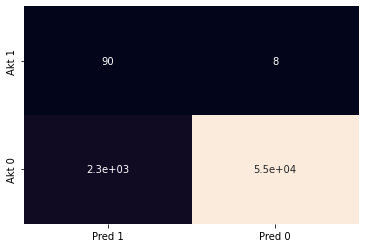

In [75]:
sns.heatmap(df_US, annot=True, cbar=False)
plt.show()

In [ ]:
## metode iseng

In [77]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [78]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [79]:
non_fraud = df_train[df_train['Class']==0] ## kelas majority
fraud = df_train[df_train['Class']==1] ## kelas minority

In [80]:
fraud_OS = resample(fraud, replace=True, n_samples=120000, random_state = 42)

In [81]:
non_fraud_US = resample(non_fraud, # kelas majority
                                 replace=False,
                                 n_samples=120000, #kelas minority
                                 random_state = 42)

In [82]:
df_US_OS = pd.concat([non_fraud_US, fraud_OS])

In [83]:
X_train_UOS = df_US_OS.drop(columns='Class')
y_train_UOS = df_US_OS['Class']

In [84]:
LR_UOS = LogisticRegression()

In [85]:
LR_UOS.fit(X_train_UOS, y_train_UOS)

LogisticRegression()

In [86]:
y_predUOS = LR_UOS.predict(X_test)

In [87]:
print(classification_report(y_test, y_predUOS))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [88]:
cm_UOS = confusion_matrix(y_test, y_predUOS, labels=[1,0])

In [90]:
df_UOS = pd.DataFrame(cm_UOS, index=['Akt 1', 'Akt 0'], columns = ['Pred 1','Pred 0'])
df_UOS

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,1987,54877


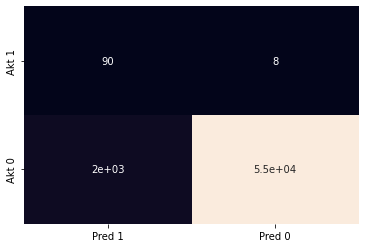

In [91]:
sns.heatmap(df_UOS, annot=True, cbar=False)
plt.show()

## SMOTE - Synthetic Minority Oversampling Technique
- **Create Synthetic Randomly** from minoruty class (Class 1), until it has the same amount with majority class (Class 0)

In [14]:
import imblearn

In [ ]:
## Install Package Imblearn
conda install -c conda-forge imbalanced-learn==0.6

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
y_train.head()

265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64

In [19]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [3]:
sm = SMOTE(random_state=42)

In [20]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [21]:
## Optional for checking proportion
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)

In [22]:
df_SMOTE['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [23]:
LR_SMOTE = LogisticRegression()

In [24]:
LR_SMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [25]:
y_predSMOTE = LR_SMOTE.predict(X_test)

In [26]:
print(classification_report(y_test, y_predSMOTE))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [29]:
cm_SMOTE = confusion_matrix(y_test, y_predSMOTE, labels=[1,0])

In [30]:
df_SMOTE = pd.DataFrame(cm_SMOTE, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

In [31]:
df_SMOTE

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,1273,55591


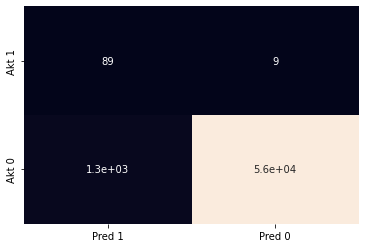

In [32]:
sns.heatmap(df_SMOTE, annot=True, cbar=False)
plt.show()

In [ ]:
## Class Weight
- With class weighting, no need to use SMOTE or random sampling
- Using the first X_train and  y_train
- Focusing on learning the model
- Total Class Weight = 1

In [33]:
LR_CW = LogisticRegression(class_weight={0:0.3, 1:.97})

In [35]:
LR_CW.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.97})

In [37]:
y_predCW = LR_CW.predict(X_test)

In [38]:
print(classification_report(y_test, y_predCW))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.83      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
cm_CW = confusion_matrix(y_test, y_predCW, labels=[1,0])

In [40]:
df_CW = pd.DataFrame(cm_CW, index=['Akt 1', 'Akt 0'], columns = ['Pred 1','Pred 0'])
df_CW

,Pred 1,Pred 0
Akt 1,81,17
Akt 0,42,56822


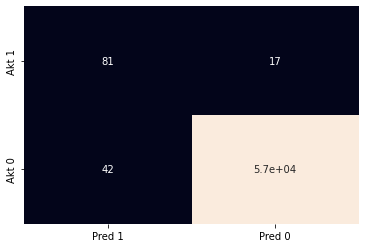

In [41]:
sns.heatmap(df_CW, annot=True, cbar=False)
plt.show()

In [42]:
LR_CW2 = LogisticRegression(class_weight={0:.10, 1:.90})

In [43]:
LR_CW2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [45]:
y_predCW2 = LR_CW2.predict(X_test)

In [46]:
print(classification_report(y_test,y_predCW2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.84      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.92      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
cm_CW2 = confusion_matrix(y_test, y_predCW2, labels=[1,0])
df_CW2 = pd.DataFrame(cm_CW2, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_CW2

,Pred 1,Pred 0
Akt 1,82,16
Akt 0,111,56753


In [48]:
### Improvement Menggunakan Model

In [49]:
from sklearn.svm import SVC

In [51]:
SVM_1 =SVC()

In [52]:
SVM_1.fit(X_train, y_train)

SVC()

In [53]:
y_predSVM = SVM_1.predict(X_test)

In [55]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [56]:
cm_svm = confusion_matrix(y_test, y_predSVM, labels=[1,0])
df_svm = pd.DataFrame(cm_svm, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_svm

,Pred 1,Pred 0
Akt 1,0,98
Akt 0,0,56864


In [57]:
### Optimize Model

In [16]:
from sklearn.preprocessing import StandardScaler

In [59]:
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [60]:
X_train_sc = std.transform(X_train)

In [61]:
X_test_sc = std.transform(X_test)

In [62]:
SVM_2 = SVC(max_iter=400)

In [63]:
SVM_2.fit(X_train_sc, y_train)

SVC(max_iter=400)

In [64]:
y_SVM = SVM_2.predict(X_test_sc)

In [65]:
print(classification_report(y_test,y_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [67]:
cm_svm2 = confusion_matrix(y_test, y_SVM, labels=[1,0])
df_svm2 = pd.DataFrame(cm_svm2, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_svm2

,Pred 1,Pred 0
Akt 1,74,24
Akt 0,3,56861


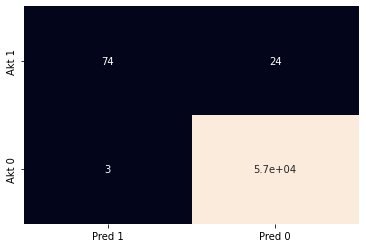

In [68]:
sns.heatmap(df_svm2, annot=True, cbar=False)
plt.show()

In [ ]:
### Feature Engineering & Turning Weight
### Scaling + Class

In [69]:
rbs = RobustScaler()

In [70]:
rbs.fit(X_train)

RobustScaler()

In [71]:
X_train_scaled = rbs.transform(X_train)

In [72]:
X_test_scaled = rbs.transform(X_test)

In [73]:
SVM_3 = SVC(class_weight={0:0.40, 1:.60})

In [74]:
SVM_3.fit(X_train_scaled, y_train)

SVC(class_weight={0: 0.4, 1: 0.6})

In [75]:
y_SVM2 = SVM_3.predict(X_test_scaled)

In [76]:
print(classification_report(y_test, y_SVM2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.95      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
### SVM 4

In [77]:
SVM_4 = SVC(class_weight={0:.10, 1:.90})

In [78]:
SVM_4.fit(X_train_sc, y_train)

SVC(class_weight={0: 0.1, 1: 0.9})

In [79]:
y_SVM3 = SVM_4.predict(X_test_sc)

In [80]:
print(classification_report(y_test, y_SVM3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.74      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
cm_svm3 = confusion_matrix(y_test, y_SVM3, labels=[1,0])
df_svm3 = pd.DataFrame(cm_svm3, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_svm3

,Pred 1,Pred 0
Akt 1,73,25
Akt 0,17,56847


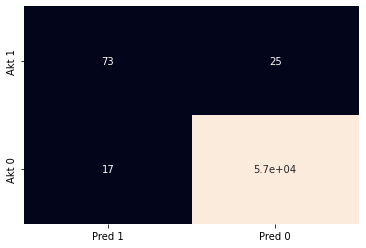

In [82]:
sns.heatmap(df_svm3, annot=True, cbar=False)
plt.show()